## Gold price prediction
-----------------------------------
# About the dataset

>> Data Overview: This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.

> It is a regression type problem therfore here we using regressor model **RANDOM FOREST REGRESSOR**


# Importing the dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Accessing the gold price dataset

In [ ]:
# importing dataset

data = pd.read_csv('/content/gld_price_data.csv')
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
# checking for missing or null values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# checking the stastical measures complete dataset
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation detials

> here we constructing a heat map to visualize the positive and negative correlation

In [ ]:
corr = data.corr()

<Axes: >

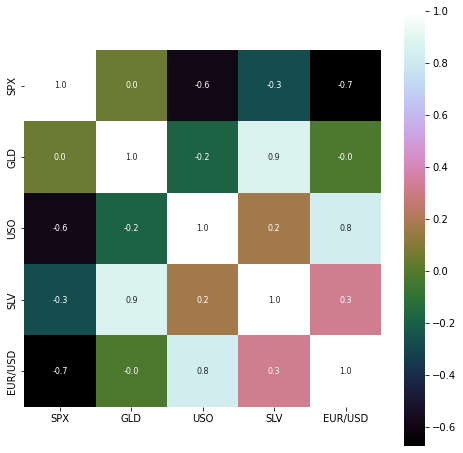

In [ ]:
# constructing heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'cubehelix')

In [ ]:
# to check particular column corrilation
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Distribution of gold price in different days

in this evaluation we can see that the majority of the distribution lies in 120 range

<ipython-input-14-b83f9e8ef5e9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

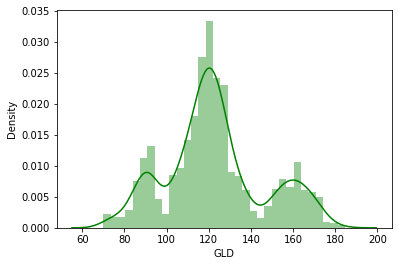

In [ ]:
# Checking the distribution of the gold price
sns.distplot(data['GLD'],color='green')

Splitting the data into features and label

we simply dropping the date column because it is not that much relevant for the evaluation

In [ ]:
# Splitting the data into features and target

x = data.drop(['Date','GLD'],axis = 1)
y = data.GLD

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
# splitting the data and label into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

Initializing the model and model training

**RandomForestRegressor**

here we providing **n_estimator** = 100, which is the number of trees that we need in that random forest classifier, and also there are some other parameters like, **maxfeatures** - to limit the number of features while looking for a split in one tree

In [ ]:
model = RandomForestRegressor(n_estimator = 100)

In [21]:
# fitting the training data
model.fit(x_train,y_train)

RandomForestRegressor()

Score evaluation

in regression models for model evaluatiohn we use **R squared or R squared error** error 
which is  standardized form of MSE

represents the fraction of variance of the actual value of the response variable captured by the regression model rather than the MSE which captures the residual error.

In [ ]:
# test data evaluation using r squared 

testdata = model.predict(x_test)
testdata

In [24]:
# now checking the r squared error
score = metrics.r2_score(testdata,y_test)
print('R squared error :',score)

R squared error : 0.989910946036193


Comparing the actual value and predicted value by using a plot

But before that we need to convert the y_test value into a list beacuse currently it is in data frame format. the plot will how error if we plot it without changing

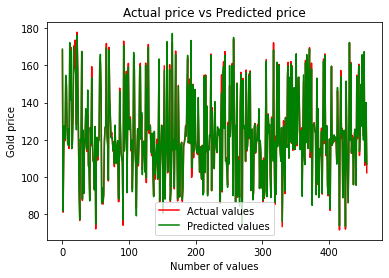

In [26]:
y_test = list(y_test)
plt.plot(y_test,color = 'red', label = 'Actual values')
plt.plot(testdata, color = 'green',label = 'Predicted values')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()